In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as sc

from math import sqrt, log, exp

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
from sklearn import datasets,metrics
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.hierarchy import cophenet, inconsistent, maxRstat
from scipy.spatial.distance import pdist
from scipy import stats

# I - Presentation

I.A - Dataset Comprehension

In [5]:
redwine = pd.read_csv("C:/Users/cerfi/OneDrive/Bureau/ISEP/A2/DataAnalysis/Projet/wine quality/winequality-red.csv",sep=";")
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
whitewine = pd.read_csv("C:/Users/cerfi/OneDrive/Bureau/ISEP/A2/DataAnalysis/Projet/wine quality/winequality-white.csv",sep=";")
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Describing files

In [161]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [162]:
whitewine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


We merge the 2 datasets in one to have different results

In [7]:
all_wines = pd.concat([redwine,whitewine])

I.B - Data treatment - Missing values

In [18]:
print("Checking missing values for red wine")
print()
print("Missing data for Fixed acidity :" , redwine["fixed acidity"].isnull().sum())
print("Missing data for volatile acidity :" , redwine["volatile acidity"].isnull().sum())
print("Missing data for Citric acid :" , redwine["citric acid"].isnull().sum())
print("Missing data for residual sugar :" , redwine["residual sugar"].isnull().sum())
print("Missing data for Chlorides :" , redwine["chlorides"].isnull().sum())
print("Missing data for Free sulfur dioxide :" , redwine["free sulfur dioxide"].isnull().sum())
print("Missing data for Total sulfur dioxide :" , redwine["total sulfur dioxide"].isnull().sum())
print("Missing data for Density :" , redwine["density"].isnull().sum())
print("Missing data for pH :" , redwine["pH"].isnull().sum())
print("Missing data for Sulphates :" , redwine["sulphates"].isnull().sum())
print("Missing data for Alcohol :" , redwine["alcohol"].isnull().sum())
print("Missing data for quality :" , redwine["quality"].isnull().sum())

Checking missing values for red wine

Missing data for Fixed acidity : 0
Missing data for volatile acidity : 0
Missing data for Citric acid : 0
Missing data for residual sugar : 0
Missing data for Chlorides : 0
Missing data for Free sulfur dioxide : 0
Missing data for Total sulfur dioxide : 0
Missing data for Density : 0
Missing data for pH : 0
Missing data for Sulphates : 0
Missing data for Alcohol : 0
Missing data for quality : 0


In [19]:
print("Checking missing values for white wine")
print()
print("Missing data for Fixed acidity :" , whitewine["fixed acidity"].isnull().sum())
print("Missing data for volatile acidity :" , whitewine["volatile acidity"].isnull().sum())
print("Missing data for Citric acid :" , whitewine["citric acid"].isnull().sum())
print("Missing data for residual sugar :" , whitewine["residual sugar"].isnull().sum())
print("Missing data for Chlorides :" , whitewine["chlorides"].isnull().sum())
print("Missing data for Free sulfur dioxide :" , whitewine["free sulfur dioxide"].isnull().sum())
print("Missing data for Total sulfur dioxide :" , whitewine["total sulfur dioxide"].isnull().sum())
print("Missing data for Density :" , whitewine["density"].isnull().sum())
print("Missing data for pH :" , whitewine["pH"].isnull().sum())
print("Missing data for Sulphates :" , whitewine["sulphates"].isnull().sum())
print("Missing data for Alcohol :" , whitewine["alcohol"].isnull().sum())
print("Missing data for quality :" , whitewine["quality"].isnull().sum())

Checking missing values for white wine

Missing data for Fixed acidity : 0
Missing data for volatile acidity : 0
Missing data for Citric acid : 0
Missing data for residual sugar : 0
Missing data for Chlorides : 0
Missing data for Free sulfur dioxide : 0
Missing data for Total sulfur dioxide : 0
Missing data for Density : 0
Missing data for pH : 0
Missing data for Sulphates : 0
Missing data for Alcohol : 0
Missing data for quality : 0


I.C - Primary Analysis

In [23]:
def hist_quality_repartition(data, color_name):        
    plt.hist(data["quality"], edgecolor = "black", color = color_name, bins=[0,1,2,3,4,5,6,7,8,9,10], align="left")

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False) 

    plt.title("Wines quality histogram")
    plt.xlabel("Quality")
    plt.ylabel("Number of wines")

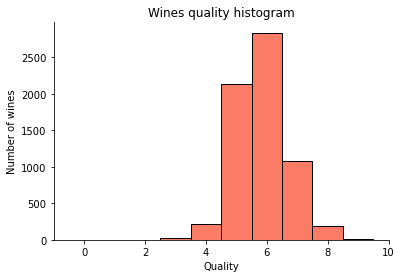

In [22]:
color_name = '#FB7C66'
hist_quality_repartition(all_wines, color_name)

Text(0.5, 1.0, 'All wine quality repartition')

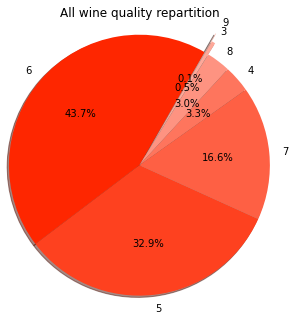

In [20]:
labels = [6,5,7,4,8,3,9]
quality_values = all_wines["quality"].value_counts(normalize='True')
quality_values
plt.pie(quality_values, labels = labels, autopct='%1.1f%%', colors = ["#FE2600", "#FE411F","#FE6044", "#FE755D", "#FE9381", "#FEA899", "#FEBEB2"], explode=[0,0,0,0,0,0.15,0.25], shadow=True, startangle = 60, radius =1.5)
plt.title("All wine quality repartition", pad=40)

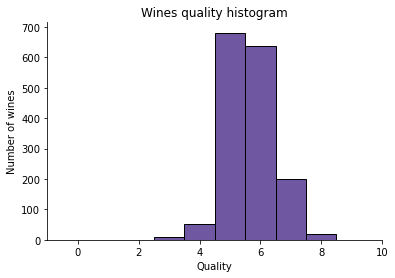

In [25]:
color_name = '#6F57A1'
hist_quality_repartition(redwine, color_name)

Text(0.5, 1.0, 'Red wine quality repartition')

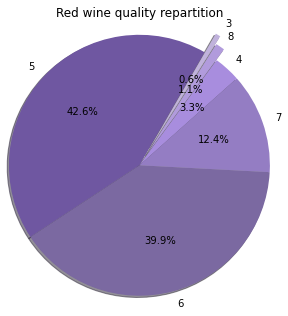

In [124]:
labels = [5,6,7,4,8,3]
quality_values = redwine["quality"].value_counts(normalize='True')
plt.pie(quality_values, labels = labels, autopct='%1.1f%%', colors = ["#6F57A1", "#7B69A1","#947DC3", "#A88DDE", "#B19BDC", "#C0B2DC"], explode=[0,0,0,0,0.15,0.25], shadow=True, startangle = 60, radius =1.5)
plt.title("Red wine quality repartition", pad=40)

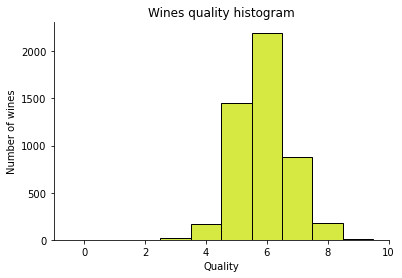

In [26]:
color_name = '#D6E842'
hist_quality_repartition(whitewine, color_name)

Text(0.5, 1.0, 'White wine quality repartition')

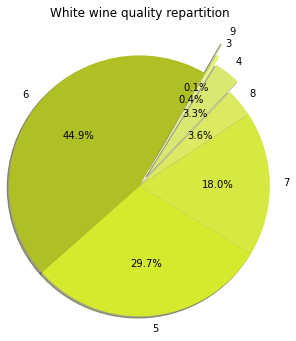

In [127]:
labels = [6,5,7,8,4,3,9]
quality_values = whitewine["quality"].value_counts(normalize='True')
plt.pie(quality_values, labels = labels, autopct='%1.1f%%', colors = ["#AFBF24", "#D5E92D","#D6E842", "#DBEA62", "#DAE770", "#EAF879", "#EFF9A4"], explode=[0,0,0,0,0.15,0.25,0.4], shadow=True, startangle=60, radius = 1.5)
plt.title("White wine quality repartition", pad=60)

Outliers and regulations

In [17]:
def ZRscore_outlier(df):
    out=[]
    med = np.median(df)
    ma = stats.median_abs_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
#     print("Outliers:",out)
    return out

In [18]:
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates","alcohol", "quality"]
for r in range(12):
    redwine_outliers = ZRscore_outlier(redwine[labels[r]])
    print("Red Wine ", labels[r], "has", len(redwine_outliers),"outliers : ", redwine_outliers)
    print()
    
for w in range(12):
    whitewine_outliers = ZRscore_outlier(whitewine[labels[w]])
    print("White Wine ", labels[w], "has", len(whitewine_outliers),"outliers : ", whitewine_outliers)
    print()   

Red Wine  fixed acidity has 49 outliers :  [12.8, 12.8, 15.0, 15.0, 12.5, 13.3, 13.4, 12.4, 12.5, 13.8, 13.5, 12.6, 12.5, 12.8, 12.8, 14.0, 13.7, 13.7, 12.7, 12.5, 12.8, 12.6, 15.6, 12.5, 13.0, 12.5, 13.3, 12.4, 12.5, 12.9, 14.3, 12.4, 15.5, 15.5, 15.6, 13.0, 12.7, 13.0, 12.7, 12.4, 12.7, 13.2, 13.2, 13.2, 15.9, 13.3, 12.9, 12.6, 12.6]

Red Wine  volatile acidity has 10 outliers :  [1.13, 1.07, 1.33, 1.33, 1.09, 1.24, 1.185, 1.115, 1.58, 1.18]

Red Wine  citric acid has 0 outliers :  []

Red Wine  residual sugar has 164 outliers :  [6.1, 6.1, 3.8, 3.9, 4.4, 10.7, 5.5, 5.9, 5.9, 3.8, 5.1, 4.65, 4.65, 5.5, 5.5, 5.5, 5.5, 7.3, 7.2, 3.8, 5.6, 3.6, 4.0, 4.0, 4.0, 4.0, 7.0, 4.0, 4.0, 6.4, 5.6, 3.6, 5.6, 11.0, 11.0, 3.65, 4.5, 4.8, 5.8, 5.8, 3.8, 4.4, 6.2, 4.2, 7.9, 7.9, 3.7, 4.5, 6.7, 6.6, 3.7, 5.2, 15.5, 4.1, 8.3, 6.55, 6.55, 4.6, 6.1, 4.3, 5.8, 5.15, 6.3, 4.2, 4.2, 4.6, 4.2, 4.6, 4.3, 4.3, 7.9, 4.6, 5.1, 5.6, 5.6, 6.0, 3.6, 8.6, 7.5, 4.4, 4.25, 6.0, 3.9, 4.2, 3.6, 3.6, 4.0, 4.0, 4.0, 6.6, 

Is there wine out of regulation ?

Sulfuric rates & limitations

Text(0.5, 1.0, 'Red wine sulfuric limitations')

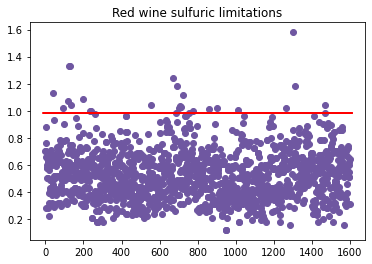

In [257]:
number_redWine = np.linspace(start=0,stop=1599,num=1599)
sulfuric_highLimit = np.linspace(start=0.98,stop=0.98,num=1599)

plt.scatter(number_redWine, redwine["volatile acidity"], color = "#6F57A1")
plt.scatter(number_redWine, sulfuric_highLimit, color = "red", marker = "_")
plt.title("Red wine sulfuric limitations")

Text(0.5, 1.0, 'White wine sulfuric limitations')

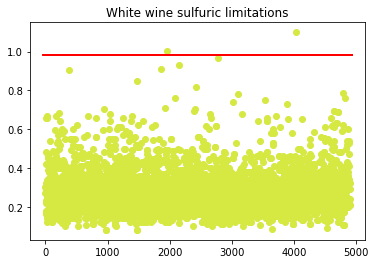

In [256]:
number_whitewine = np.linspace(start=0,stop=4898,num=4898)
sulfuric_highLimit = np.linspace(start=0.98,stop=0.98,num=4898)

plt.scatter(number_whitewine, whitewine["volatile acidity"], color = "#D6E842")
plt.scatter(number_whitewine, sulfuric_highLimit, color = "red", marker = "_")
plt.title("White wine sulfuric limitations")

Alcohol recommendations

Text(0.5, 1.0, 'Red wine alcohol recommendation')

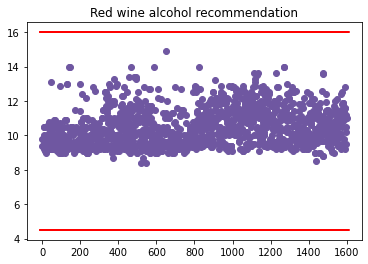

In [8]:
number_redWine = np.linspace(start=0,stop=1599,num=1599)
alcohol_highLimit = np.linspace(start=16,stop=16,num=1599)
alcohol_lowLimit = np.linspace(start=4.5,stop=4.5,num=1599)

plt.scatter(number_redWine, redwine["alcohol"], color = "#6F57A1")
plt.scatter(number_redWine, alcohol_highLimit, color = "red", marker = "_")
plt.scatter(number_redWine, alcohol_lowLimit, color = "red", marker = "_")
plt.title("Red wine alcohol recommendations")

Text(0.5, 1.0, 'White wine alcohol recommendations')

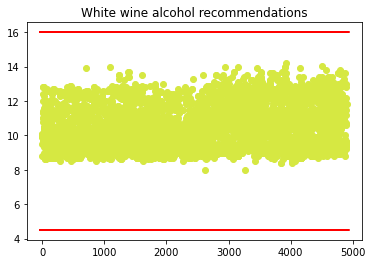

In [9]:
number_whitewine = np.linspace(start=0,stop=4898,num=4898)
alcohol_highLimit = np.linspace(start=16,stop=16,num=4898)
alcohol_lowLimit = np.linspace(start=4.5,stop=4.5,num=4898)

plt.scatter(number_whitewine, whitewine["alcohol"], color = "#D6E842")
plt.scatter(number_whitewine, alcohol_highLimit, color = "red", marker = "_")
plt.scatter(number_whitewine, alcohol_lowLimit, color = "red", marker = "_")
plt.title("White wine alcohol recommendations")

Total sulfur dioxide

Text(0.5, 1.0, 'Red wine total sulfure dioxide')

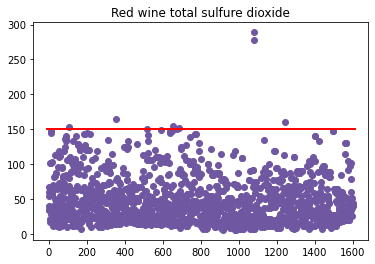

In [15]:
number_redWine = np.linspace(start=0,stop=1599,num=1599)
TSD_highLimit = np.linspace(start=150,stop=150,num=1599)

plt.scatter(number_redWine, redwine["total sulfur dioxide"], color = "#6F57A1")
plt.scatter(number_redWine, TSD_highLimit, color = "red", marker = "_")
plt.title("Red wine total sulfure dioxide")

Text(0.5, 1.0, 'White wine total sulfure dioxide')

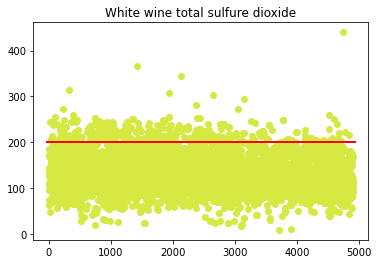

In [16]:
number_whitewine = np.linspace(start=0,stop=4898,num=4898)
TSD_highLimit = np.linspace(start=200,stop=200,num=4898)

plt.scatter(number_whitewine, whitewine["total sulfur dioxide"], color = "#D6E842")
plt.scatter(number_whitewine, TSD_highLimit, color = "red", marker = "_")
plt.title("White wine total sulfure dioxide")

Density limitations

Text(0.5, 1.0, 'Red wine density')

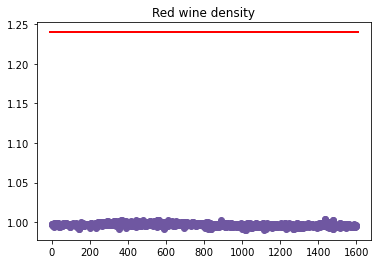

In [13]:
number_redWine = np.linspace(start=0,stop=1599,num=1599)
density_highLimit = np.linspace(start=1.24,stop=1.24,num=1599)

plt.scatter(number_redWine, redwine["density"], color = "#6F57A1")
plt.scatter(number_redWine, density_highLimit, color = "red", marker = "_")
plt.title("Red wine density")

Text(0.5, 1.0, 'White wine density')

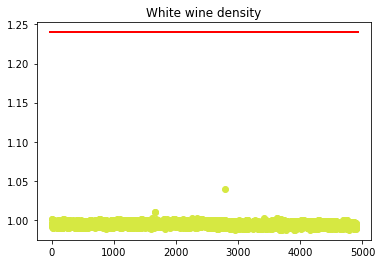

In [14]:
number_whitewine = np.linspace(start=0,stop=4898,num=4898)
density_highLimit = np.linspace(start=1.24,stop=1.24,num=4898)

plt.scatter(number_whitewine, whitewine["density"], color = "#D6E842")
plt.scatter(number_whitewine, density_highLimit, color = "red", marker = "_")
plt.title("White wine density")

# II - Observations

II.A - Analysis of quality depending on attributes

In [70]:
def average_attribute_byQuality(labels, attribute, unit):
    redwineQ_FA = redwine.copy()
    whitewineQ_FA = whitewine.copy()
    allwinesQ_FA = all_wines.copy()
    
    redwineQ_FA = redwineQ_FA.drop(columns=labels)
    whitewineQ_FA = whitewineQ_FA.drop(columns=labels)
    allwinesQ_FA = allwinesQ_FA.drop(columns=labels)
    
    #We plot the quality depending on the choosen attribute
    fig = plt.figure(figsize = (9,4))
    redwineQ_FA_plot, =plt.plot(redwineQ_FA.groupby(["quality"]).mean(), color='#6F57A1')
    whitewineQ_FA_plot, =plt.plot(whitewineQ_FA.groupby(["quality"]).mean(), color='#D6E842')
    allwinesQ_FA_plot, =plt.plot(allwinesQ_FA.groupby(["quality"]).mean(), color='red', linewidth=3)
    
    #Plot
    title = "Quality depending on " + attribute
    ytitle = attribute + " (" + unit + ")"
    plt.legend([redwineQ_FA_plot, whitewineQ_FA_plot, allwinesQ_FA_plot], ['red wine', 'white wine', 'all wines'])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel("Quality")
    plt.ylabel(ytitle)
    plt.title(title)
    plt.grid()    

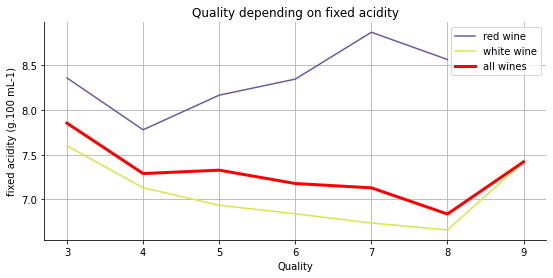

In [56]:
labels = ["volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates","alcohol"]
attribute = "fixed acidity"
unit = "g.100 mL-1"
average_attribute_byQuality(labels, attribute, unit)

Quality vs volatile acidity

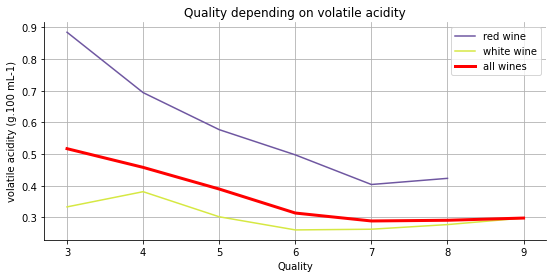

In [68]:
labels = ["fixed acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates","alcohol"]
attribute = "volatile acidity"
unit = "g.100 mL-1"
average_attribute_byQuality(labels, attribute, unit)

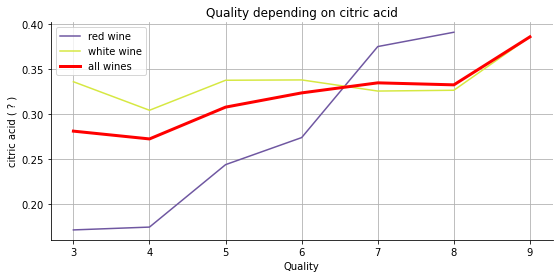

In [67]:
labels = ["fixed acidity","volatile acidity","residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates","alcohol"]
attribute = "citric acid"
unit = " ? "
average_attribute_byQuality(labels, attribute, unit)

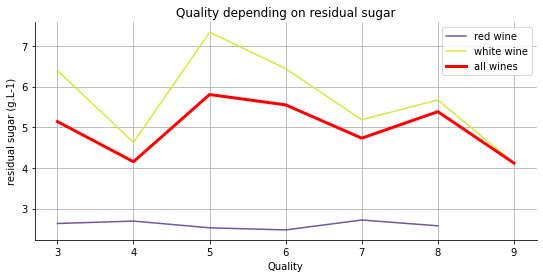

In [66]:
labels = ["fixed acidity","volatile acidity","citric acid","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates","alcohol"]
attribute = "residual sugar"
unit = "g.L-1"
average_attribute_byQuality(labels, attribute, unit)

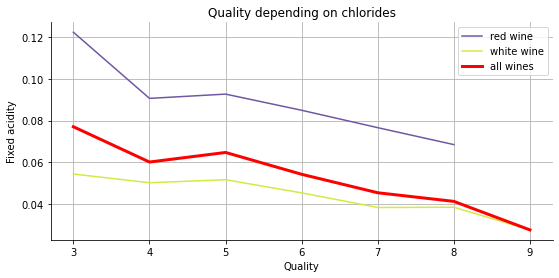

In [50]:
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates","alcohol"]
attribute = "chlorides"
unit = "g.L-1"
average_attribute_byQuality(labels, attribute, unit)

In [ ]:
Quality vs free sulfur dioxide

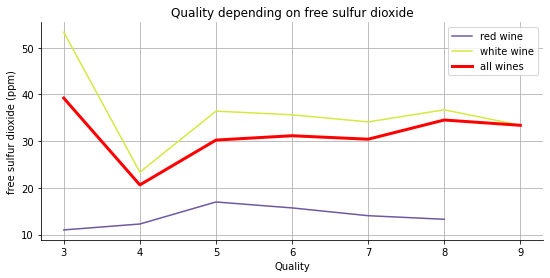

In [65]:
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "total sulfur dioxide","density","pH","sulphates","alcohol"]
attribute = "free sulfur dioxide"
unit = "ppm"
average_attribute_byQuality(labels, attribute, unit)

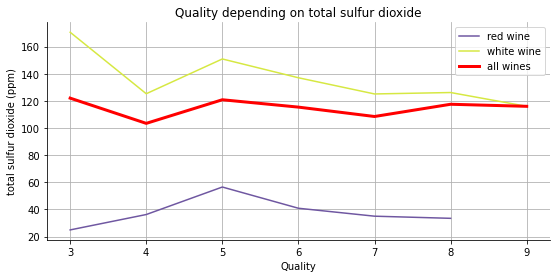

In [63]:
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "free sulfur dioxide","density","pH","sulphates","alcohol"]
attribute = "total sulfur dioxide"
unit = "ppm"
average_attribute_byQuality(labels, attribute, unit)

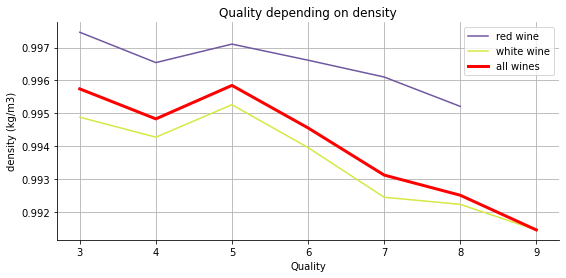

In [62]:
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "free sulfur dioxide","total sulfur dioxide","pH","sulphates","alcohol"]
attribute = "density"
unit = "kg/m3"
average_attribute_byQuality(labels, attribute, unit)

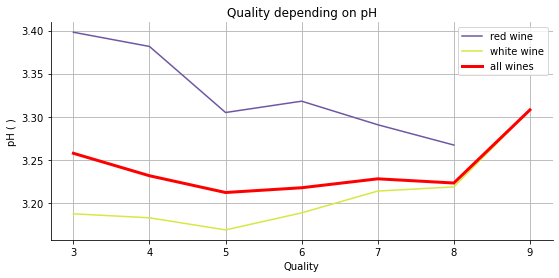

In [61]:
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "free sulfur dioxide","total sulfur dioxide","density","sulphates","alcohol"]
attribute = "pH"
unit = " "
average_attribute_byQuality(labels, attribute, unit)

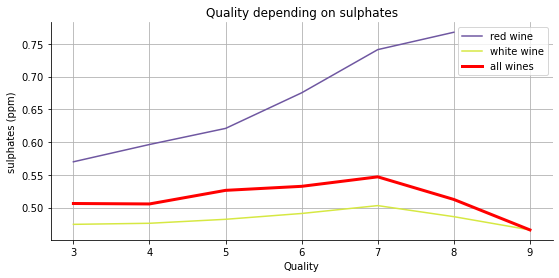

In [60]:
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "free sulfur dioxide","total sulfur dioxide","density","pH","alcohol"]
attribute = "sulphates"
unit = "ppm"
average_attribute_byQuality(labels, attribute, unit)

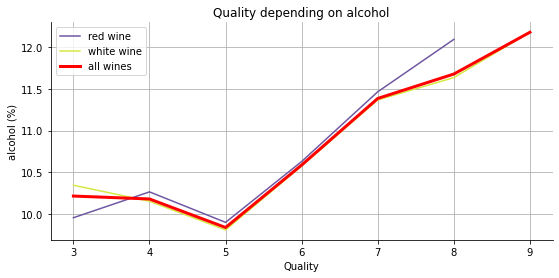

In [58]:
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates"]
attribute = "alcohol"
unit = "%"
average_attribute_byQuality(labels, attribute, unit)

II.B - Correlation between attributes

In [82]:
def correlation_matrix_wine(dataset, attribute):
    corr = dataset.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
    print(corr[attribute])

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
Name: quality, dtype: float64


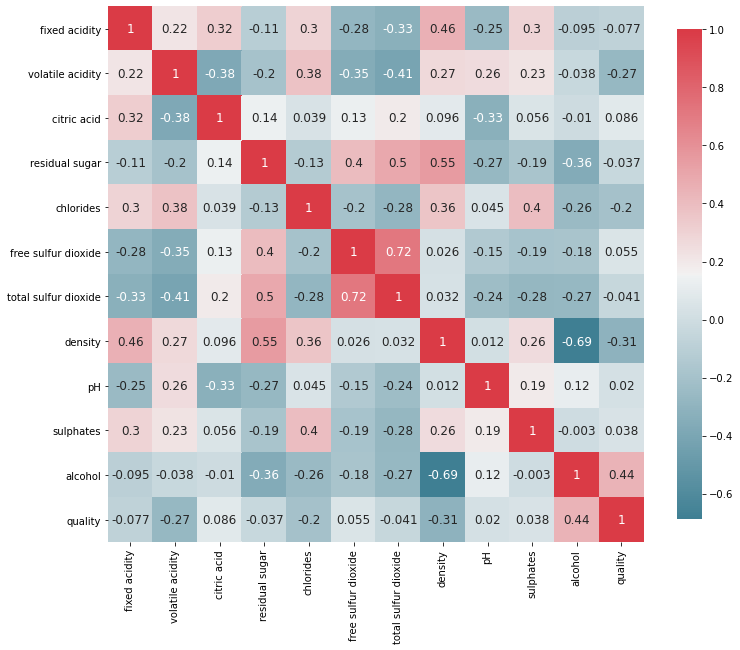

In [83]:
correlation_matrix_wine(all_wines, "quality")

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


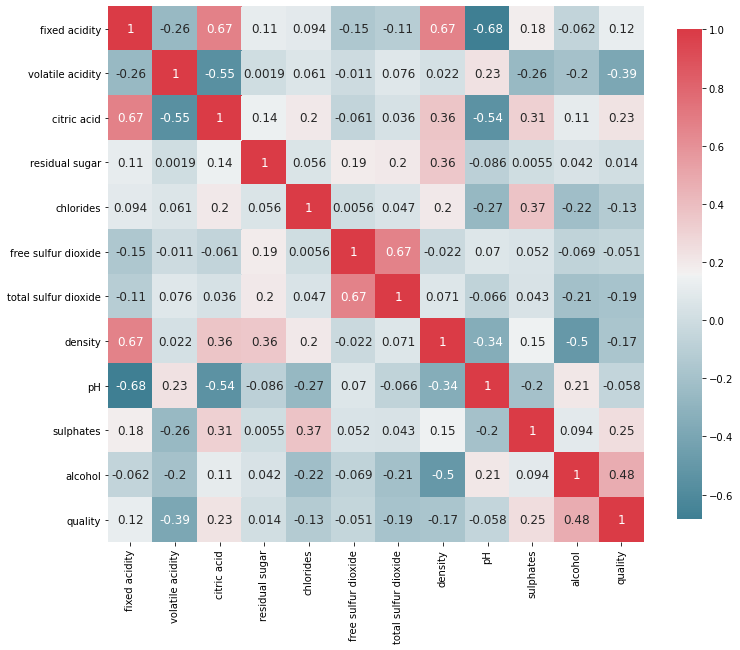

In [84]:
correlation_matrix_wine(redwine, "quality")

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64


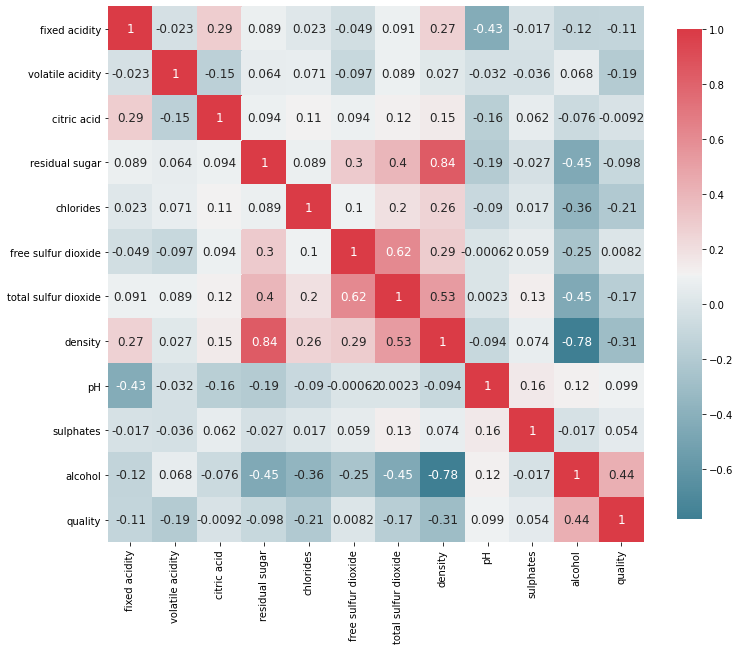

In [85]:
correlation_matrix_wine(whitewine, "quality")

# III - Classification

III.A - PCA 2 components

III.B - Boxplots depending on attributes

In [103]:
def boxplots_wine(attribute):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,6))
    sns.boxplot(x='quality', y=attribute, data = redwine, palette='Purples', ax=axes[0], flierprops = dict(markerfacecolor = '0.50', markersize = 2))
    sns.boxplot(x='quality', y=attribute, data = whitewine, palette='Greens', ax=axes[1], flierprops = dict(markerfacecolor = '0.50', markersize = 2))
    fig.suptitle(t= 'Boxplot of '+ attribute + " depending on quality", fontsize=15)

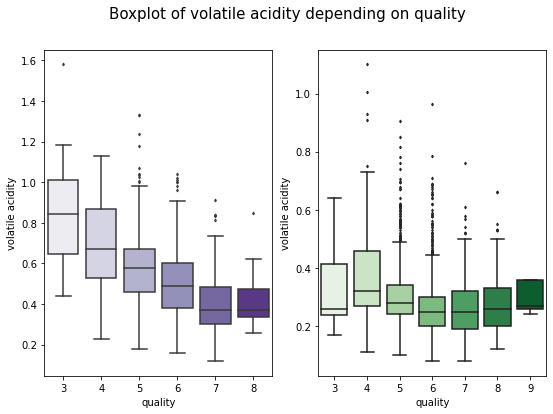

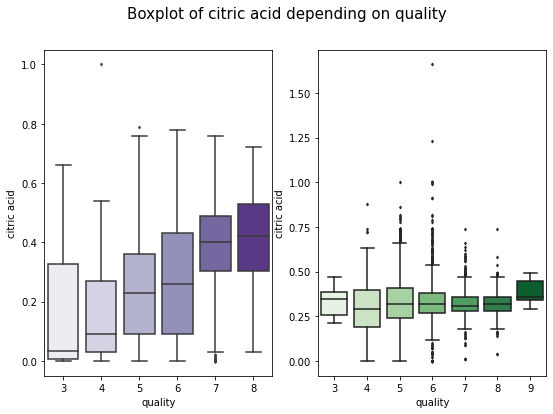

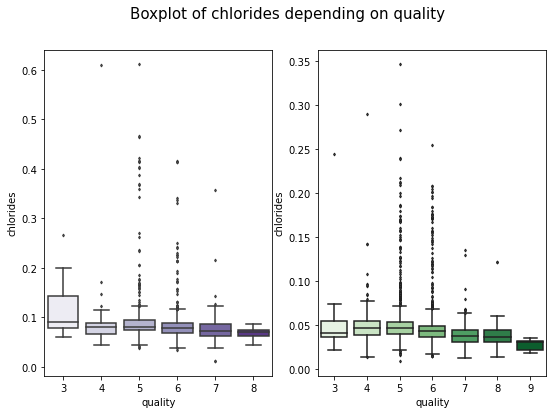

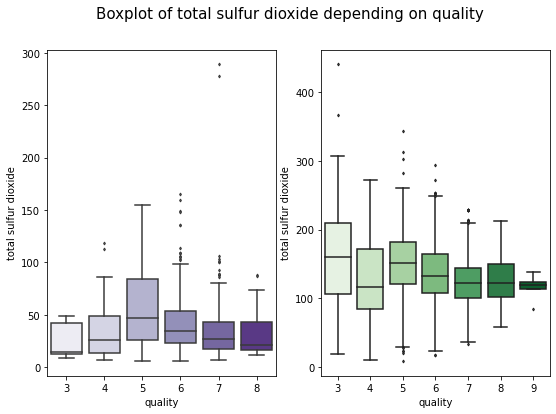

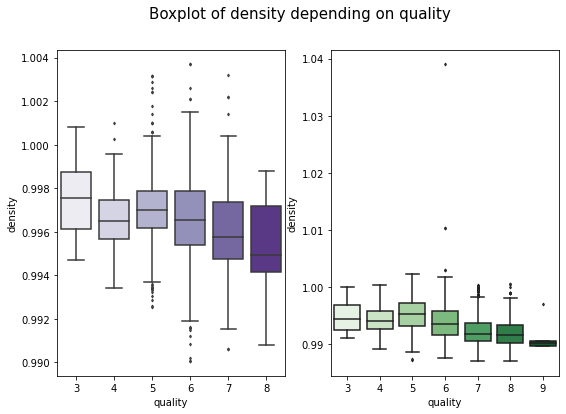

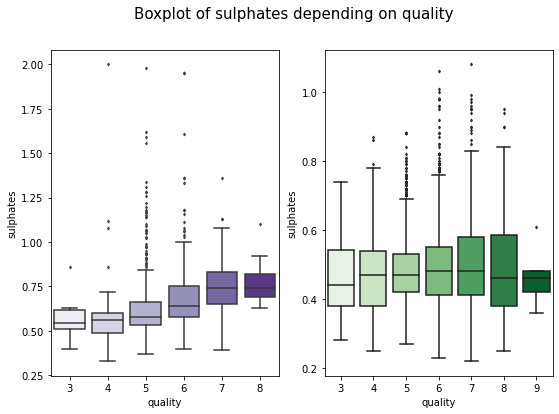

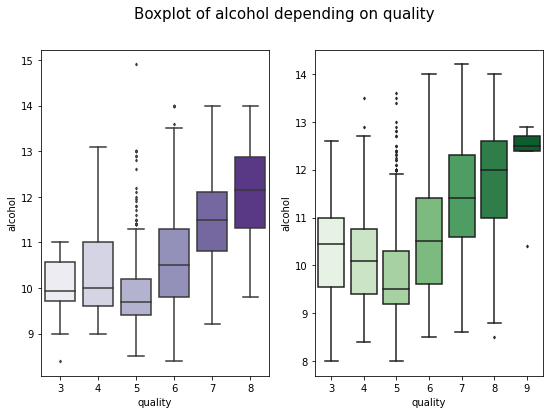

In [104]:
labels = ["volatile acidity","citric acid","chlorides",
         "total sulfur dioxide","density","sulphates", "alcohol"]
for i in range(len(labels)):
    attribute = labels[i]
    boxplots_wine(attribute)

III.C - Chi-squared test

In [114]:
def chi_squared_test(data, attribute):
    table = pd.crosstab(data[attribute], data["quality"])
    chi2, p, dof, expected =  stats.chi2_contingency(table.values)
    return chi2, p
    
def perform_chi_squared_test(data):
    attributes = ["fixed acidity", "volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
                  "total sulfur dioxide","density","pH","sulphates","alcohol"]
    results_attributes = []
    results_chi2 = []
    results_p = []
    
    for loop in range(len(attributes)):
        result_chi2, result_p = chi_squared_test(data, attributes[loop])
        print("Attribute :", attributes[loop])
        print("chi2 :", result_chi2)
        print("p :", result_p)
        print()
        
        results_attributes.append(attributes[loop])
        results_chi2.append(results_chi2)
        results_p.append(result_p)
    
    results = [results_attributes, results_chi2, results_p]
    

In [115]:
perform_chi_squared_test(all_wines)

Attribute : fixed acidity
chi2 : 1051.735231893533
p : 1.123398691274827e-23

Attribute : volatile acidity
chi2 : 2610.33768303139
p : 3.3772397310812704e-121

Attribute : citric acid
chi2 : 992.8860059612393
p : 7.91971630627207e-31

Attribute : residual sugar
chi2 : 2728.3804627652585
p : 1.2150969418945118e-33

Attribute : chlorides
chi2 : 2616.0829495335747
p : 2.642212929180551e-94

Attribute : free sulfur dioxide
chi2 : 2232.988338062565
p : 1.2204969879538693e-134

Attribute : total sulfur dioxide
chi2 : 3076.348295307735
p : 4.808743384014572e-89

Attribute : density
chi2 : 10121.256703869412
p : 2.0083092480344186e-218

Attribute : pH
chi2 : 839.5423163505404
p : 2.21529741508352e-07

Attribute : sulphates
chi2 : 981.0310302915492
p : 5.51306727478195e-15

Attribute : alcohol
chi2 : 2811.544879125704
p : 2.1287967567653804e-262



In [116]:
perform_chi_squared_test(redwine)

Attribute : fixed acidity
chi2 : 736.0798648275643
p : 1.4159021578050688e-13

Attribute : volatile acidity
chi2 : 1589.2143598570324
p : 3.4291008970834183e-69

Attribute : citric acid
chi2 : 695.8184581409294
p : 6.425123780025564e-19

Attribute : residual sugar
chi2 : 864.7915037110228
p : 1.6488532980084574e-28

Attribute : chlorides
chi2 : 1339.976606814801
p : 1.1813496192507552e-34

Attribute : free sulfur dioxide
chi2 : 311.81282088128876
p : 0.2398557808772426

Attribute : total sulfur dioxide
chi2 : 748.6063313729346
p : 0.18600768190933173

Attribute : density
chi2 : 3054.486937594979
p : 7.547139688049285e-33

Attribute : pH
chi2 : 642.6910931795787
p : 8.719416521344591e-10

Attribute : sulphates
chi2 : 925.7799499060715
p : 2.382366452028254e-31

Attribute : alcohol
chi2 : 1124.521396504002
p : 5.34532473687669e-90



In [117]:
perform_chi_squared_test(whitewine)

Attribute : fixed acidity
chi2 : 1336.1339103324985
p : 1.211812517160848e-100

Attribute : volatile acidity
chi2 : 1714.4920201469022
p : 2.14857093276095e-78

Attribute : citric acid
chi2 : 970.5640063818782
p : 3.367485048978115e-30

Attribute : residual sugar
chi2 : 2689.108839146217
p : 6.730882278343601e-34

Attribute : chlorides
chi2 : 1752.4475628721627
p : 8.5101202845267e-50

Attribute : free sulfur dioxide
chi2 : 2591.7417055055976
p : 2.953624518506378e-191

Attribute : total sulfur dioxide
chi2 : 3618.223185408994
p : 7.071342888665948e-176

Attribute : density
chi2 : 8369.656647238438
p : 5.732369786028939e-140

Attribute : pH
chi2 : 920.0284370232856
p : 8.664005304274299e-15

Attribute : sulphates
chi2 : 732.2387841541724
p : 5.863399476398928e-14

Attribute : alcohol
chi2 : 2039.1417745658073
p : 1.082495234291558e-152



III.D - Cramer's V

# IV - Predictions

Preparing data

In [8]:
# All wines classification version & separation of variables and targets
all_wines['goodquality'] = [1 if x >= 7 else 0 for x in all_wines['quality']]
X_allW = all_wines.drop(['quality','goodquality'], axis = 1)
y_allW = all_wines['goodquality']

# Red wines
redwine['goodquality'] = [1 if x >= 7 else 0 for x in redwine['quality']]
X_redW = redwine.drop(['quality','goodquality'], axis = 1)
y_redW = redwine['goodquality']

# White wines
whitewine['goodquality'] = [1 if x >= 7 else 0 for x in whitewine['quality']]
X_whiW = whitewine.drop(['quality','goodquality'], axis = 1)
y_whiW = whitewine['goodquality']

All wines good quality repartition

In [9]:
def wine_good_quality_repartition(data,wine):
    print(data['goodquality'].value_counts())

    #plot
    if(wine == 'all'):
        data['goodquality'].value_counts().plot(kind='bar', edgecolor = "black", color = "#FB7C66",align="center")
        plt.title("All wines good quality histogram")
    elif(wine == 'red'):
        data['goodquality'].value_counts().plot(kind='bar', edgecolor = "black", color = "#6F57A1",align="center")
        plt.title("Red wines good quality histogram")
    elif(wine == 'white'):
        data['goodquality'].value_counts().plot(kind='bar', edgecolor = "black", color = "#D6E842",align="center")
        plt.title("White wines good quality histogram")
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False) 
    plt.xlabel("Quality")
    plt.ylabel("Number of wines")

0    5220
1    1277
Name: goodquality, dtype: int64


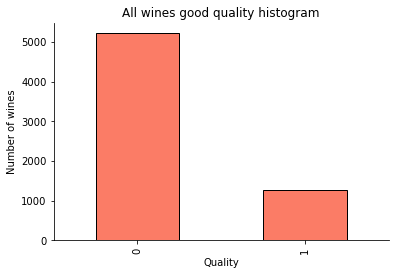

In [50]:
wine_good_quality_repartition(all_wines,'all')

Red wines good quality repartition

0    1382
1     217
Name: goodquality, dtype: int64


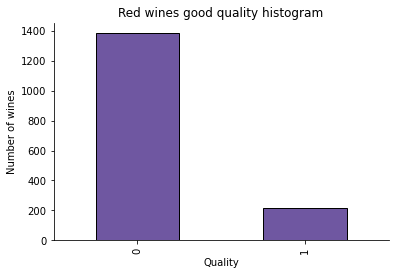

In [49]:
wine_good_quality_repartition(redwine,'red')

White wines good quality repartition

0    3838
1    1060
Name: goodquality, dtype: int64


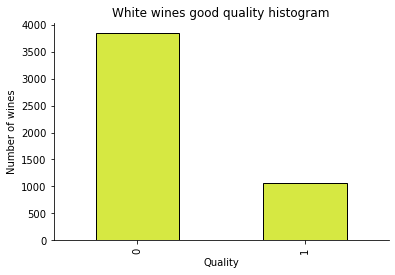

In [53]:
wine_good_quality_repartition(whitewine,'white')

Preparing Data for Modelling

In [10]:
# Standardizing Feature Variables
# Red wines
X_redW_features = X_redW
X_redW = StandardScaler().fit_transform(X_redW)

# White wines
X_whiW_features = X_whiW
X_whiW = StandardScaler().fit_transform(X_whiW)


# Spliting data
# Red wines
X_redW_train, X_redW_test, y_redW_train, y_redW_test = train_test_split(X_redW, y_redW, test_size=.25, random_state=0)

# White wines
X_whiW_train, X_whiW_test, y_whiW_train, y_whiW_test = train_test_split(X_whiW, y_whiW, test_size=.25, random_state=0)

IV.A - Naive Bayes

In [60]:
def naive_bayes(X_train, X_test, y_train, y_test):
    NB_model = GaussianNB()
    NB_model.fit(X_train, y_train)
    y_nbPred =NB_model.predict(X_test) 
    print(classification_report(y_test, y_nbPred))

In [58]:
# Red wines
naive_bayes(X_redW_train, X_redW_test, y_redW_train, y_redW_test)

              precision    recall  f1-score   support

           0       0.96      0.84      0.90       355
           1       0.37      0.76      0.50        45

    accuracy                           0.83       400
   macro avg       0.67      0.80      0.70       400
weighted avg       0.90      0.83      0.85       400



In [59]:
# White wines
naive_bayes(X_whiW_train, X_whiW_test, y_whiW_train, y_whiW_test)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       963
           1       0.43      0.70      0.53       262

    accuracy                           0.74      1225
   macro avg       0.67      0.72      0.67      1225
weighted avg       0.80      0.74      0.76      1225



IV.B - Decision tree

In [56]:
def decision_tree(X_train, X_test, y_train, y_test):
    tree_model = DecisionTreeClassifier(random_state=1)
    tree_model.fit(X_train, y_train)
    y_treePred = tree_model.predict(X_test)
    print(classification_report(y_test, y_treePred))

In [58]:
# Red wines
decision_tree(X_redW_train, X_redW_test, y_redW_train, y_redW_test)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       355
           1       0.53      0.73      0.62        45

    accuracy                           0.90       400
   macro avg       0.75      0.83      0.78       400
weighted avg       0.92      0.90      0.90       400



In [59]:
# White wines
decision_tree(X_whiW_train, X_whiW_test, y_whiW_train, y_whiW_test)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       963
           1       0.58      0.57      0.58       262

    accuracy                           0.82      1225
   macro avg       0.73      0.73      0.73      1225
weighted avg       0.82      0.82      0.82      1225



IV.C - Random forest

In [62]:
def random_forest(X_train, X_test, y_train, y_test):
    random_forest = RandomForestClassifier(random_state=1)
    random_forest.fit(X_train, y_train)
    y_randomForestPred = random_forest.predict(X_test)
    print(classification_report(y_test, y_randomForestPred))

In [63]:
# Red wines
random_forest(X_redW_train, X_redW_test, y_redW_train, y_redW_test)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.68      0.58      0.63        45

    accuracy                           0.92       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.92      0.92      0.92       400



In [64]:
# White wines
random_forest(X_whiW_train, X_whiW_test, y_whiW_train, y_whiW_test)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       963
           1       0.76      0.53      0.63       262

    accuracy                           0.86      1225
   macro avg       0.82      0.74      0.77      1225
weighted avg       0.86      0.86      0.85      1225



IV.D - K Nearest Neighbors

In [ ]:
def KNN(X_train, X_test, y_train, y_test):
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train,y_train)
    y_knnPred=knn_model.predict(X_test)
    print(classification_report(y_test, y_knnPred))

In [71]:
# Red wines
KNN(X_redW_train, X_redW_test, y_redW_train, y_redW_test)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       355
           1       0.48      0.49      0.48        45

    accuracy                           0.88       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.88      0.88      0.88       400



In [72]:
# White wines
KNN(X_whiW_train, X_whiW_test, y_whiW_train, y_whiW_test)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       963
           1       0.59      0.50      0.54       262

    accuracy                           0.82      1225
   macro avg       0.73      0.70      0.71      1225
weighted avg       0.81      0.82      0.81      1225



IV.E - Support-Vector Machine

In [66]:
def SVM(X_train, X_test, y_train, y_test):
    svc_model = SVC()
    svc_model.fit(X_train, y_train)
    y_SVCPred=svc_model.predict(X_test)
    print(classification_report(y_test, y_SVCPred))

In [67]:
# Red wines
SVM(X_redW_train, X_redW_test, y_redW_train, y_redW_test)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       355
           1       0.73      0.36      0.48        45

    accuracy                           0.91       400
   macro avg       0.83      0.67      0.71       400
weighted avg       0.90      0.91      0.90       400



In [68]:
# White wines
SVM(X_whiW_train, X_whiW_test, y_whiW_train, y_whiW_test)

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       963
           1       0.68      0.32      0.44       262

    accuracy                           0.82      1225
   macro avg       0.76      0.64      0.67      1225
weighted avg       0.81      0.82      0.80      1225



IV.F - Logistic Regression

In [13]:
def logisitc_regression(X_train, X_test, y_train, y_test):
    log_reg_model = LogisticRegression()
    log_reg_model.fit(X_train, y_train)
    y_logRegPred=log_reg_model.predict(X_test)
    print(classification_report(y_test, y_logRegPred))

In [14]:
# Red wines
logisitc_regression(X_redW_train, X_redW_test, y_redW_train, y_redW_test)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       355
           1       0.55      0.38      0.45        45

    accuracy                           0.90       400
   macro avg       0.74      0.67      0.69       400
weighted avg       0.88      0.90      0.89       400



In [15]:
# White wines
logisitc_regression(X_whiW_train, X_whiW_test, y_whiW_train, y_whiW_test)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       963
           1       0.57      0.26      0.35       262

    accuracy                           0.80      1225
   macro avg       0.70      0.60      0.62      1225
weighted avg       0.77      0.80      0.77      1225



# Others

PCA & KNN all wines

Confusion matrix:
[[  17    5    6    3    1    0    0]
 [   0  123   44   41    7    0    1]
 [   7   55 1780  305   76   12    0]
 [   6   28  286 2346  195   53    2]
 [   0    4   20  127  785   23    2]
 [   0    1    2   14   15  105    0]
 [   0    0    0    0    0    0    0]]

Accuracy:
0.793597044789903
Confusion matrix:
[[  15    7    7    2    3    0    0]
 [   0  122   46   53   15    1    0]
 [  11   46 1793  321   87   18    1]
 [   2   32  264 2317  186   44    1]
 [   2    7   26  130  773   25    2]
 [   0    2    2   13   15  105    0]
 [   0    0    0    0    0    0    1]]

Accuracy:
0.7889795290133907


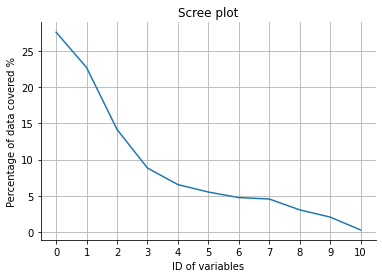

In [109]:
X = all_wines.loc[:,'fixed acidity':'alcohol']
y = all_wines['quality']

scaler = StandardScaler().fit(X)
X = scaler.transform(X)
pca = PCA() # creates an instance of PCA class
results = pca.fit(X) # applies PCA on predictor variables
Z = results.transform(X) # create a new array of latent variables

plt.plot(results.explained_variance_ratio_*100) # scree plot
plt.ylabel("Percentage of data covered %")
plt.xlabel("ID of variables")
plt.title("Scree plot")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


pd.DataFrame(Z[:,:6], columns=list(
[u'Acidity', u'Sulfides', u'More alcohol', u'Chlorides', u'More residual sugar', u'Less pH'])).head(10)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

#original dataset
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)
pred = neigh.predict(X)
print('Confusion matrix:')
print(confusion_matrix(pred,y))
print('\nAccuracy:')
print(accuracy_score(pred,y))

#6 PC
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(Z[:,:6],y)
pred = neigh.predict(Z[:,:6])
print('Confusion matrix:')
print(confusion_matrix(pred,y))
print('\nAccuracy:')
print(accuracy_score(pred,y))

Hierarchical clustering

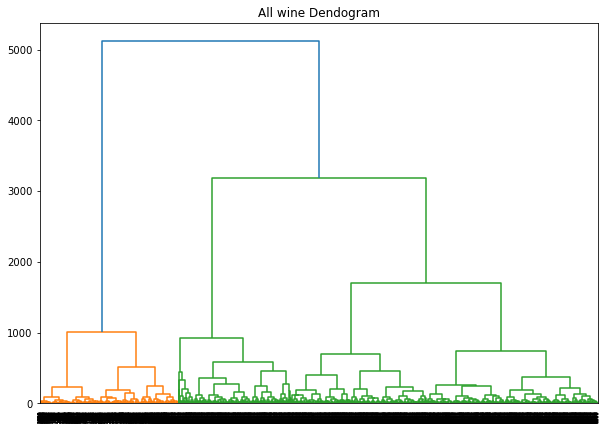

In [6]:
plt.figure(figsize=(10, 7))
plt.title("All wine Dendogram")
dend = dendrogram(shc.linkage(all_wines, method='ward'))

In [24]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
fit = pd.Series(cluster.fit_predict(all_wines))

all_wines.insert(1, "Ward_group", [21, 23, 24, 21], True)

tab = all_wines.groupby(
    'ward', as_index = False).aggregate({
     'fixed acidity': [np.mean]
    ,'volatile acidity': [np.mean]
    ,'citric acid': [np.mean]
    ,'residual sugar': [np.mean]
    ,'chlorides': [np.mean]
    ,'free sulfur dioxide': [np.mean]
    ,'total sulfur dioxide': [np.mean]
    ,'density': [np.mean]
    ,'pH': [np.mean]
    ,'sulphates': np.mean
    ,'alcohol': [np.mean]
    ,'quality': [np.mean]})

tab.columns = [['Ward_group','fixed acidity', 'volatile acidity', 'citric acid', 
                  'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                  'density', 'pH', 'sulphates', 'alcohol', 'quality']]
tab

NameError: name 'tab' is not defined